### 0) Import Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Analyse Dataset

### 1-1) Import Dataset

In [2]:
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

In [3]:
original_dataset = pd.read_csv("/kaggle/input/electric-vhicule-population-data/Electric_Vehicle_Population_Data.csv")
dataset = add_random_missing_values(original_dataset, 0.01)
dataset_backup = dataset.copy()

### 1-2) Understand basics about dataset

In [4]:
dataset.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023.0,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006.0,POINT (-122.8728334 47.5798304),NaN,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811.0,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017.0,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713.0,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940.0,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


In [5]:
dataset.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
205434,1N4BZ1CV2N,Chelan,Peshastin,WA,98847.0,2022.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,12.0,187384494.0,POINT (-120.6051696 47.5510173),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
205435,1FTVW1EV0P,Snohomish,Everett,WA,98208.0,2023.0,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,255036386.0,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10
205436,5YJXCDE22H,Spokane,Cheney,WA,99004.0,2017.0,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,6.0,221631588.0,POINT (-117.5836098 47.4951312),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
205437,5YJ3E1EA3J,King,Vashon,WA,98070.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,34.0,336983496.0,POINT (-122.466938 47.429244),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
205438,7SAYGDEE7P,Spokane,Spokane,WA,99208.0,2023.0,TESLA,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,6.0,228335040.0,POINT (-117.4268937 47.7323627),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10


In [6]:
dataset.shape

(205439, 17)

In [7]:
categorical_features = ["UNKNOWN"]
numerical_features = []

for col in dataset.columns:
    if (dataset[col].dtype == "object") or (dataset[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)
        
for col in dataset.columns:
    if col in categorical_features:
        dataset[col] = pd.Categorical(dataset[col])

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   VIN (1-10)                                         203487 non-null  category
 1   County                                             203409 non-null  category
 2   City                                               203385 non-null  category
 3   State                                              203382 non-null  category
 4   Postal Code                                        203430 non-null  float64 
 5   Model Year                                         203398 non-null  float64 
 6   Make                                               203351 non-null  category
 7   Model                                              203460 non-null  category
 8   Electric Vehicle Type                              203259 non-nu

In [9]:
dataset.isna().sum()

VIN (1-10)                                           1952
County                                               2030
City                                                 2054
State                                                2057
Postal Code                                          2009
Model Year                                           2041
Make                                                 2088
Model                                                1979
Electric Vehicle Type                                2180
Clean Alternative Fuel Vehicle (CAFV) Eligibility    2053
Electric Range                                       1959
Base MSRP                                            2101
Legislative District                                 2491
DOL Vehicle ID                                       2092
Vehicle Location                                     2061
Electric Utility                                     2062
2020 Census Tract                                    2020
dtype: int64

In [10]:
dataset_dist = dataset.describe().T
dataset_dist = dataset_dist.apply(pd.to_numeric, errors='coerce')
dataset_dist["CV"] = dataset_dist["std"] / dataset_dist["50%"]
dataset_dist.applymap(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

/tmp/ipykernel_30/1191576599.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset_dist.applymap(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)


,count,mean,std,min,25%,50%,75%,max,CV
Postal Code,203430.00,98177.66,2423.21,1731.00,98052.00,98125.00,98372.00,99577.00,0.02
Model Year,203398.00,2020.96,2.99,1997.00,2019.00,2022.00,2023.00,2025.00,0.00
Electric Range,203480.00,52.14,88.05,0.00,0.00,0.00,47.00,337.00,inf
Base MSRP,203338.00,922.26,7762.19,0.00,0.00,0.00,0.00,845000.00,inf
Legislative District,202948.00,28.97,14.91,1.00,17.00,33.00,42.00,49.00,0.45
DOL Vehicle ID,203347.00,227732978.23,72059646.42,4469.00,193548046.50,238240061.00,261874301.00,479254772.00,0.30
2020 Census Tract,203419.00,52976879971.28,1590477541.36,1001020100.00,53033009802.00,53033030003.00,53053073123.00,56021001100.00,0.03


<span style="color:red">Note:</span>Since following columns are about the unique ID or cars location information, we do not need them. (We will analyse dataset only County, City and State scale.)

In [11]:
dataset.drop(columns=["VIN (1-10)", "Postal Code", "Legislative District", "DOL Vehicle ID", "Vehicle Location", "2020 Census Tract", "Electric Utility"], inplace=True)

#### <span style="color:red">What we learned from basics?</span>
- First of all we checked the tail and head rows our dataset to understand what it is look like.
- We have 11 columns (after dropping 6 columns) and nearly 205.000 rows.
- We can understand that dataset is all about electric car stats. It contains where them located (in USA), which brand they are and what are their range specs.
- Nearly %1 percent of NA values exist in every column. Following section will handle NA values.
- We can visualize followings:
    * Which state has the most electric cars?
    * Which brand is mostly preferred by American costumers?
    * Commonly used brands for each state.
    * Which brand offers the longest range?
    * Which brand is more eco-friendly?


### 1-3) Fill NA Values

<span style="color:red">Note:</span> When we analysed dataset info and dataset shape, we saw that nearly %1 null values. (Yes, we know that we corrupted dataset intentionally at the beginning of the notebook.) So we need the fill this values with reasonable approximation. Since 'Electric Range' and 'Base MSRP' columns median is 0 but mean is not, we fill numerical NA values with its column median value and we use spesific approach for categorical columns(Check below). We consider the dataset_dist dataframe to conclude the decision.

Fill numerical columns with median

In [12]:
numeric_columns = dataset.select_dtypes(include='number').columns
for column in numeric_columns:
    dataset[column] = dataset[column].fillna(dataset[column].median())

County, State and City is dependent to each other. So fill any Na values in one column with another.

Lets say County is NA in row A. But we know the City of row A, then check dataset rows whose City field is same with row A. Then copy its County to row A. If there is multiple possible value (not possible for County and City example), then copy the most frequent one. 

In [13]:
def fill_na_with_other_column(row, column, other_column, df):
    if pd.isna(row[column]):
        matching_values = df[df[other_column] == row[other_column]][column].dropna()
        if not matching_values.empty:
            return matching_values.iloc[0]
    return row[column]

columns = ["City", "County", "State"] 
for i in range(0, len(columns)):
    for j in range(i + 1, len(columns)):
        dataset[columns[j]] = dataset.apply(lambda row: fill_na_with_other_column(row, columns[j], columns[i], dataset), axis=1)

dataset[columns[0]] = dataset.apply(lambda row: fill_na_with_other_column(row, columns[0], columns[1], dataset), axis=1)

# If still there is na values in these columns we can drop them since there is not location information available. (There will be very little number of rows dropped)
row_num_before = dataset.shape[0]
for column in columns:
    dataset = dataset[dataset[column].notnull()]
print(f"{row_num_before - dataset.shape[0]} rows dropped.")

24 rows dropped.


Same logic applies for following columns.

In [14]:
columns = ["Model", "Make", "Electric Vehicle Type", "Clean Alternative Fuel Vehicle (CAFV) Eligibility"]
for i in range(0, len(columns)):
    for j in range(i + 1, len(columns)):
        dataset[columns[j]] = dataset.apply(lambda row: fill_na_with_other_column(row, columns[j], columns[i], dataset), axis=1)

dataset[columns[0]] = dataset.apply(lambda row: fill_na_with_other_column(row, columns[0], columns[1], dataset), axis=1)

#If still there is na values in these columns we can drop them since there is not location information available. (There will be very little number of rows dropped)
row_num_before = dataset.shape[0]
for column in columns:
    dataset = dataset[dataset[column].notnull()]
print(f"{row_num_before - dataset.shape[0]} rows dropped.")

25 rows dropped.


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205390 entries, 0 to 205438
Data columns (total 10 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             205390 non-null  object 
 1   City                                               205390 non-null  object 
 2   State                                              205390 non-null  object 
 3   Model Year                                         205390 non-null  float64
 4   Make                                               205390 non-null  object 
 5   Model                                              205390 non-null  object 
 6   Electric Vehicle Type                              205390 non-null  object 
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  205390 non-null  object 
 8   Electric Range                                     205390 non-null  float64
 9 

### 1-4) Data Visualization

#### Which brand is mostly preferred by costumers?

Text(0.5, 0, 'Brand')

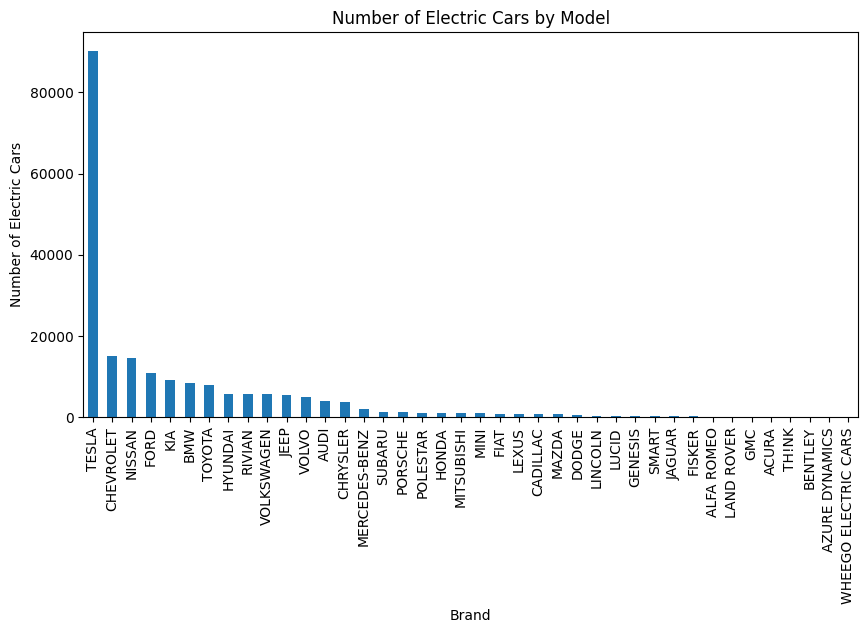

In [27]:
dataset["Make"].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of Electric Cars by Model")
plt.ylabel('Number of Electric Cars')
plt.xlabel('Brand')

#### Which model is mostly preferred by costumers?

Text(0.5, 0, 'Model')

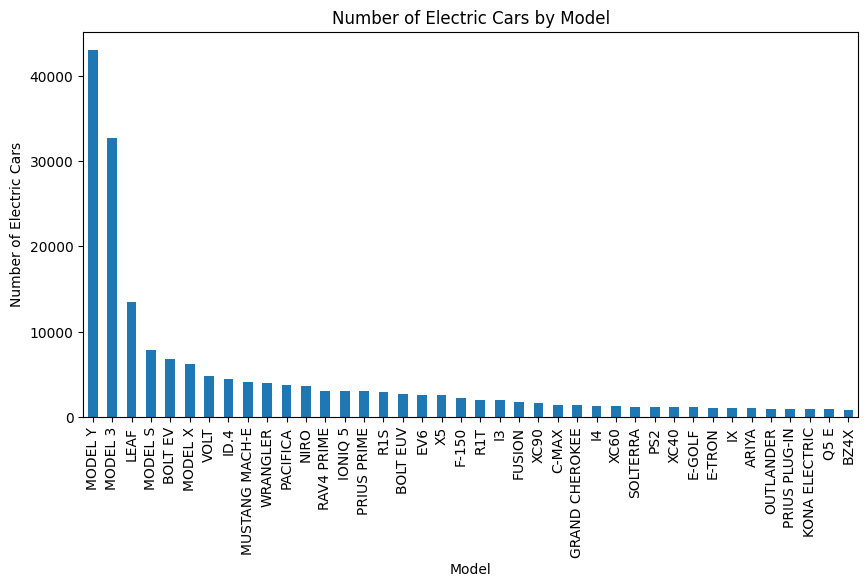

In [16]:
dataset["Model"].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of Electric Cars by Model")
plt.ylabel('Number of Electric Cars')
plt.xlabel('Model')

Again, by far Tesla (Model Y and Model 3) preferred among Americans.

#### Which model offers the longest range?

Text(0.5, 0, 'Model')

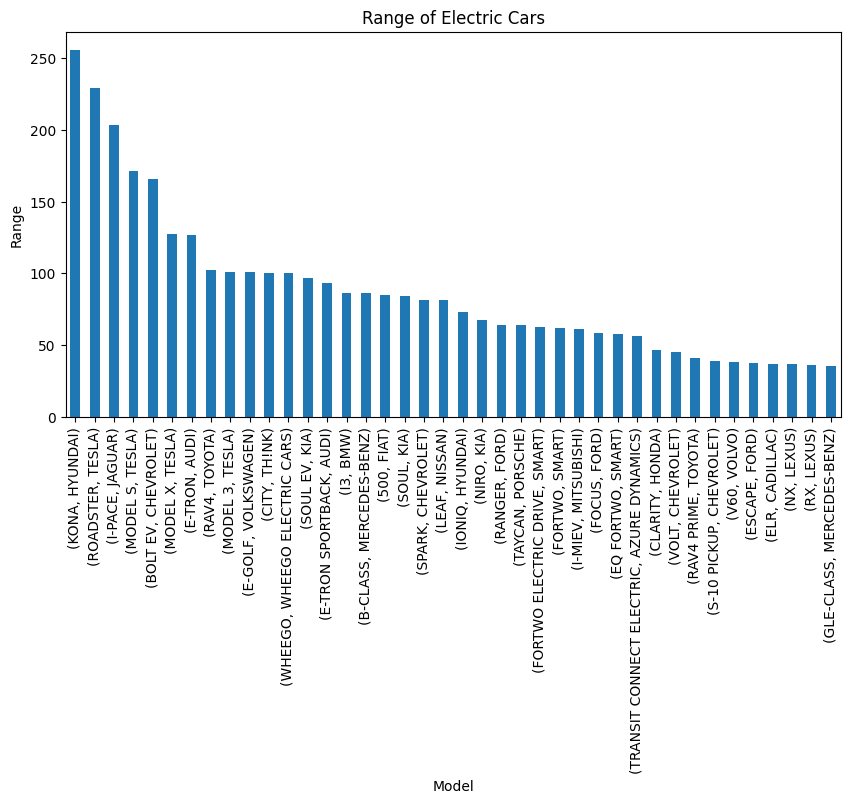

In [17]:
dataset.groupby(["Model", "Make"])["Electric Range"].mean().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Range of Electric Cars")
plt.ylabel('Range')
plt.xlabel('Model')

#### Which electric car model is the most expensive one?

Text(0.5, 0, 'Model')

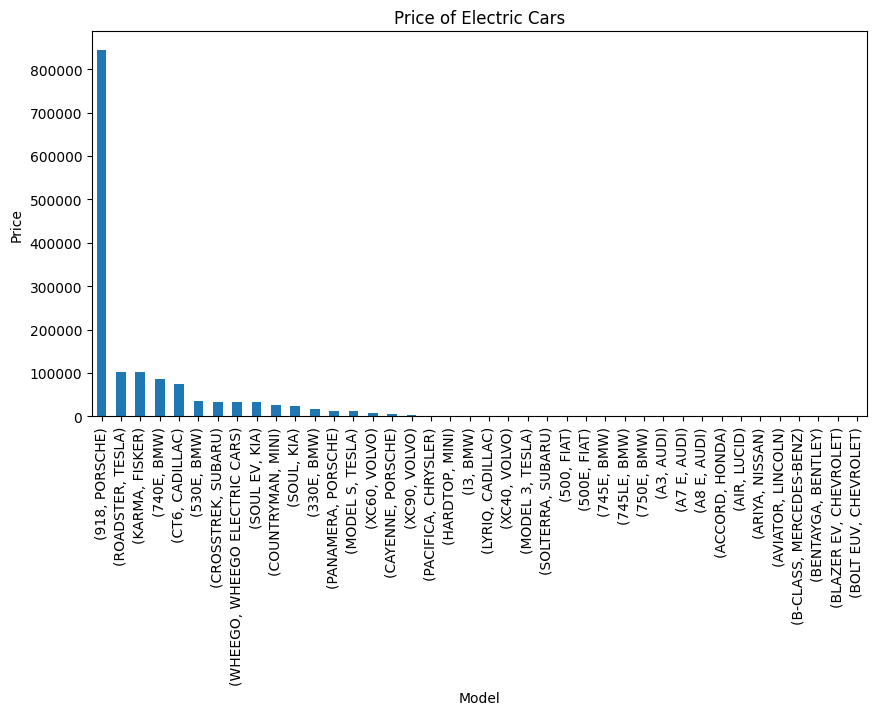

In [18]:
dataset.groupby(["Model", "Make"])["Base MSRP"].mean().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Price of Electric Cars")
plt.ylabel('Price')
plt.xlabel('Model')

<Axes: >

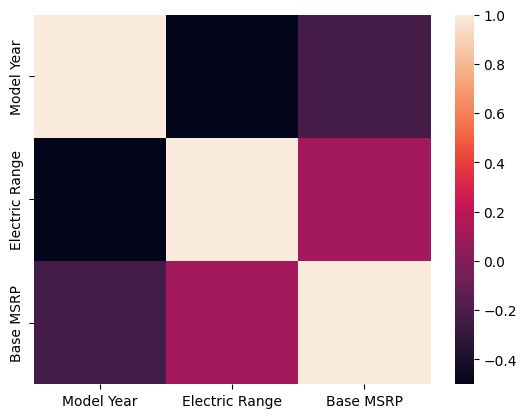

In [20]:
corr = dataset.select_dtypes('number').corr()
sns.heatmap(corr)

<span style="color:red">Note:</span>Surprisingly correlation between price, model year and electric range is very low. It may caused by hybrit cars. Lets see full electric cars.

Only 2088 instance found!


<Axes: >

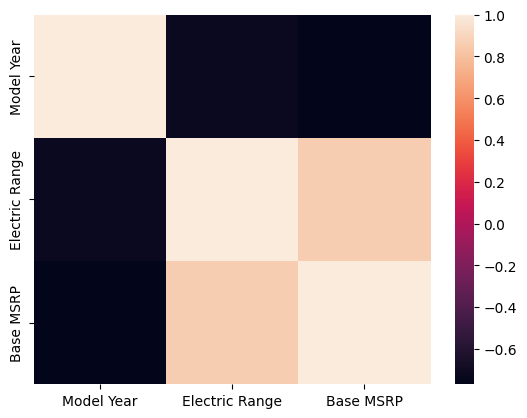

In [31]:
corr = dataset[(dataset["Electric Vehicle Type"] == "Battery Electric Vehicle (BEV)") & (dataset["Base MSRP"] != 0)].select_dtypes('number').corr()
num_of_instance = len(dataset[(dataset["Electric Vehicle Type"] == "Battery Electric Vehicle (BEV)") & (dataset["Base MSRP"] != 0)])
print(f"Only {num_of_instance} instance found!")
sns.heatmap(corr)

<span style="color:red">Note:</span>When we elemnate non full electric and zero base MSRP cars it can be seen that base MSRP and range is highly correlated.

#### <span style="color:red">What we learned from visualization?</span>
- Tesla ,by far, is the most preferred company among customers from Washington.
- Model Y and Model 3 most popular models of Tesla.
- Althought Model Y and Model 3 more popular then Hyndai Kona, Kona offers better range.
- When we analysed the base prices, Porche dominates the high-end customer market, followed by Tesla Roadster.
- Correlation between Model Year, Electric Range and Base MSRP was weak contradict with our initial expectation. After eleminating 0 Base MSRP cars and focusing only fully electric cars (only very little of instance left), we found that Base MSRP and Electric Range may be correlated.

# 2) Suggestions

### 2-1) Problems That Dataset Helps To Solve
- Since we have a subgroup of decisions of customers in Washington, this dataset may help companies that are into electric car market in Washington.
- For this companies following questions answer may be helpful to make profitable decision:
  * Which brands are popular?
  * Which models preferred mostly?
  * Is Range or Brand is more important?
  * Is selling lots of Tesla or single Proshe is more profitable?

### 2-2) Suggested Model Structures
- If you would like to guess categorical data it is a classification problem, but for numerical data it is a regression problem.
- Both problem can be solved with single ANN model.
- First try a model with 3-4 layer and reasonable node number. If results is not satisfying, you may add additional layers to extract more insight for model.